#Exploração de dados de homicídios no Brasil

Números e taxas de homicídios no Brasil, desde 1979 até 2019, por ano e território.

Fonte: Dados do IBGE, organizados pelo IPEA (Instituto de Pesquisa Econômica e Aplicada), no [Atlas da Violência](https://www.ipea.gov.br/atlasviolencia/dados-series/328).

Taxa multiplicada por 100.000

In [1]:
#Importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Criação do dataframe

df_estados = pd.read_csv('/content/drive/Shareddrives/ODTE/Scripts/Análise de dados/2022-10-21 - Análise de dados preliminar/taxa-homicidios.csv', delimiter=';').dropna()
df_estados

,cod,nome,período,valor
0,33,RJ,1980,26.05
1,35,SP,1980,13.76
2,41,PR,1980,10.89
3,31,MG,1980,8.70
4,29,BA,1980,3.37
...,...,...,...,...
1075,53,DF,2019,15.92
1076,35,SP,2019,7.32
1077,32,ES,2019,25.95
1078,33,RJ,2019,20.57


In [3]:
# Calculo da média de estados mais violentos de 1980 até 2019

estados_media_geral = df_estados.groupby(by='nome')['valor'].mean().sort_values(ascending=False)
estados_media_geral_df = pd.DataFrame(estados_media_geral).reset_index()


In [4]:
# 5 estados com maiores taxas de homicídios de 1980 até 2019

estados_media_geral_df.head(5)

,nome,valor
0,PE,41.30925
1,RJ,38.50525
2,ES,38.44950
3,AL,37.21500
4,RO,34.30850


In [5]:
# 5 estados com menores taxas de homicídios de 1980 até 2019

estados_media_geral_df.tail(5)

,nome,valor
22,TO,14.27225
23,MA,13.98925
24,MG,13.60150
25,SC,9.83650
26,PI,9.52800


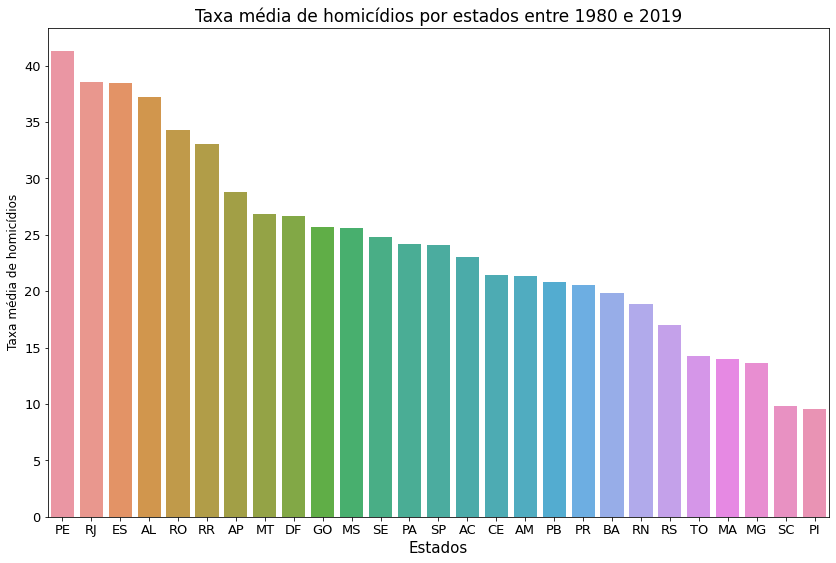

In [6]:
# Gráfico da taxa média de homicídios por estado de 1980 até 2019

fig, ax = plt.subplots(figsize =(14, 9))
sns.barplot(data=estados_media_geral_df, x='nome', y='valor')
plt.ylabel('Taxa média de homicídios', fontsize= 12)
plt.xlabel('Estados', fontsize= 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('Taxa média de homicídios por estados entre 1980 e 2019', fontsize= 17)
plt.show()

# Analisando dados a partir de 2015

In [7]:
# Calculo da média de estados mais violentos de 2015 até 2019

homicidios_2015 = df_estados[df_estados['período'] >= 2015]
homicidios_2015_grouped = pd.DataFrame(homicidios_2015.groupby(by='nome')['valor'].mean().sort_values(ascending=False)).reset_index()

In [8]:
# 5 estados com maiores taxas de homicídios de 2015 até 2019

homicidios_2015_media = pd.DataFrame(homicidios_2015.groupby(by='nome')['valor'].mean().sort_values(ascending=False).reset_index())
homicidios_2015_media.head(5)

,nome,valor
0,SE,54.438
1,RN,50.378
2,PA,48.650
3,RR,47.540
4,AL,47.400


In [9]:
# 5 estados com menores taxas de homicídios de 2015 até 2019

homicidios_2015_media.tail(5)

,nome,valor
22,DF,20.960
23,PI,19.580
24,MG,18.758
25,SC,13.224
26,SP,9.774


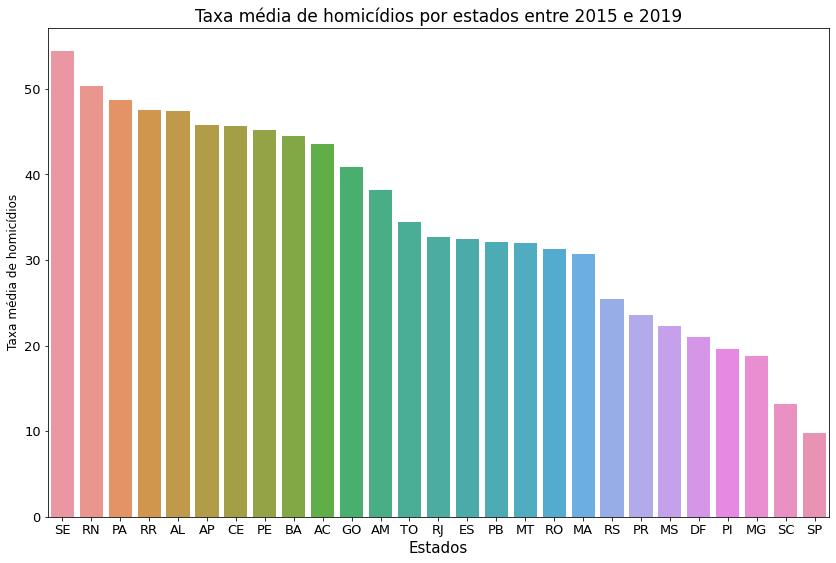

In [10]:
# Gráfico da taxa média de homicídios por estado de 2015 até 2019

fig, ax = plt.subplots(figsize =(14, 9))
sns.barplot(data=homicidios_2015_grouped, x='nome', y='valor', ci=None)
plt.ylabel('Taxa média de homicídios', fontsize= 12)
plt.xlabel('Estados', fontsize= 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('Taxa média de homicídios por estados entre 2015 e 2019', fontsize= 17)
plt.show()

In [11]:
# Estados que estão entre as 10% maiores taxas de homicídio de 2015 até 2019

df_homicidios_2015_mais_violentos = homicidios_2015_media[homicidios_2015_media['valor'] >= homicidios_2015_media['valor'].quantile(q=0.9)]
df_homicidios_2015_mais_violentos_hl = df_homicidios_2015_mais_violentos.style.highlight_max(color='#FFB27A')
df_homicidios_2015_mais_violentos_hl

,nome,valor
0,SE,54.438000
1,RN,50.378000
2,PA,48.650000


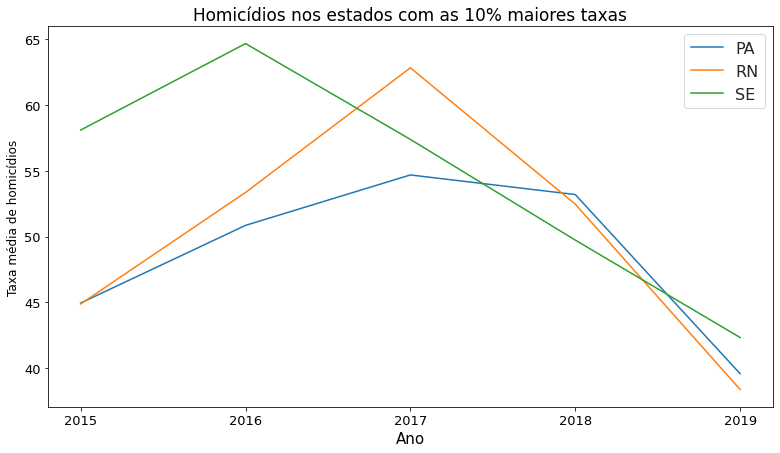

In [12]:
# Gráfico da evolução da taxa de homicídio entre os estados com as 10% maiores taxas, de 2015 até 2019: SE, RN e PA

ax, fig = plt.subplots(figsize =(13, 7))
mais_homicidios_2015 = homicidios_2015[(homicidios_2015['nome'] == 'SE') | (homicidios_2015['nome'] == 'RN') | (homicidios_2015['nome'] == 'PA')]
sns.lineplot(data = mais_homicidios_2015, x='período', y='valor', hue='nome')
sns.set_style("whitegrid")
plt.ylabel('Taxa média de homicídios', fontsize= 12)
plt.xlabel('Ano', fontsize= 15)
plt.yticks(fontsize=13)
plt.title('Homicídios nos estados com as 10% maiores taxas', fontsize= 17)
plt.xticks(range(2015, 2020), fontsize=13)
plt.legend(fontsize=16)
plt.show()

In [13]:
# Estados que estão entre as 10% menores taxas de homicídio de 2015 até 2019

df_homicidios_2015_menos_violentos = homicidios_2015_media[homicidios_2015_media['valor'] <= homicidios_2015_media['valor'].quantile(q=0.1)]
df_homicidios_2015_menos_violentos_hl = df_homicidios_2015_menos_violentos.style.highlight_min(color='#FFB27A', subset='valor')
df_homicidios_2015_menos_violentos_hl

,nome,valor
24,MG,18.758000
25,SC,13.224000
26,SP,9.774000


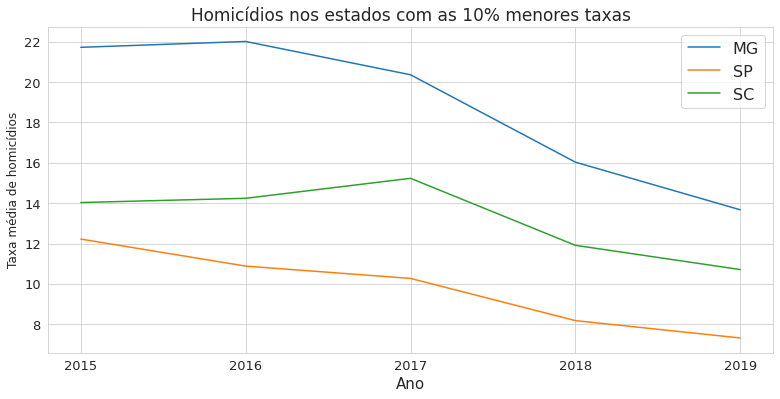

In [14]:
# Gráfico da evolução da taxa de homicídio entre os estados com as 10% menores taxas, de 2015 até 2019: MG, SP e SC

ax, fig = plt.subplots(figsize =(13, 6))
menos_homicidios_2015 = homicidios_2015[(homicidios_2015['nome'] == 'MG') | (homicidios_2015['nome'] == 'SC') | (homicidios_2015['nome'] == 'SP')]
sns.lineplot(data = menos_homicidios_2015, x='período', y='valor', hue='nome')
sns.set_style("whitegrid")
plt.ylabel('Taxa média de homicídios', fontsize= 12)
plt.xlabel('Ano', fontsize= 15)
plt.yticks(fontsize=13)
plt.title('Homicídios nos estados com as 10% menores taxas', fontsize= 17)
plt.xticks(range(2015, 2020), fontsize=13)
plt.legend(fontsize=16)
plt.show()